<a href="https://colab.research.google.com/github/Louis5228/2020-Machine-Learning/blob/main/Image_segmentation_based_on_thresholding_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Digital Image Process/HW6")

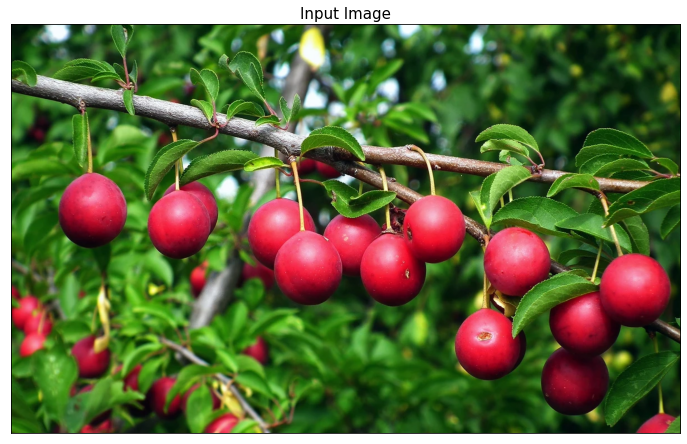

In [3]:
# load image
img = cv2.imread('fruit on tree.tif')
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.title('Input Image', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.imshow(show_img)
plt.show()

In [41]:
def cal_global_mean(prob_dist):
  return np.sum(np.arange(256) * prob_dist)

def cal_between_class_var(prob_dist, threshold, glob_m):
  prob_1 = np.sum(prob_dist[:threshold+1])
  prob_2 = 1.0 - prob_1
  mean_1 = np.sum(np.arange(0, threshold+1) * prob_dist[:threshold+1]) / prob_1
  mean_2 = np.sum(np.arange(threshold+1, 256) * prob_dist[threshold+1:]) / prob_2
  var = prob_1*(mean_1 - glob_m)**2 + prob_2*(mean_2 - glob_m)**2
  return var

In [57]:
r = img[:,:,2]

# Apply Otsu’s optimal global thresholding
normal_hist, bin_edges  = np.histogram(r, bins=np.arange(257), density=True)
glob_m = cal_global_mean(normal_hist)
var_l = list()
for k in range(255):
  var = cal_between_class_var(normal_hist, k, glob_m)
  var_l.append(var)

# Calculate Maximum Between Class Variance
max_var = max(var_l)
optimal_threshold = var_l.index(max_var)

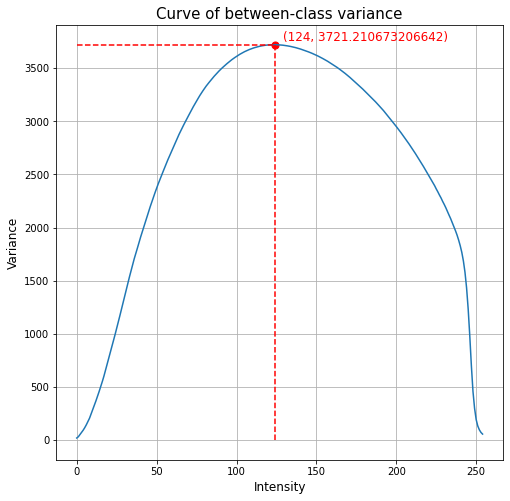

In [88]:
plt.figure(figsize=(8,8))
plt.title('Curve of between-class variance', fontsize = 15)
plt.xlabel("Intensity", fontsize = 12)
plt.ylabel("Variance", fontsize = 12)
x = np.arange(255)
y = var_l
plt.plot(x, y)
plt.scatter(optimal_threshold, max_var, s=50, c='r')
plt.plot([0,optimal_threshold], [max_var, max_var], c='r', linestyle='--')
plt.plot([optimal_threshold, optimal_threshold], [0, max_var], c='r', linestyle='--')
plt.text(optimal_threshold+5, max_var+10, '('+str(optimal_threshold)+', '+str(max_var)+')', c='r', va='bottom', fontsize=12)
plt.grid(True)
plt.show()

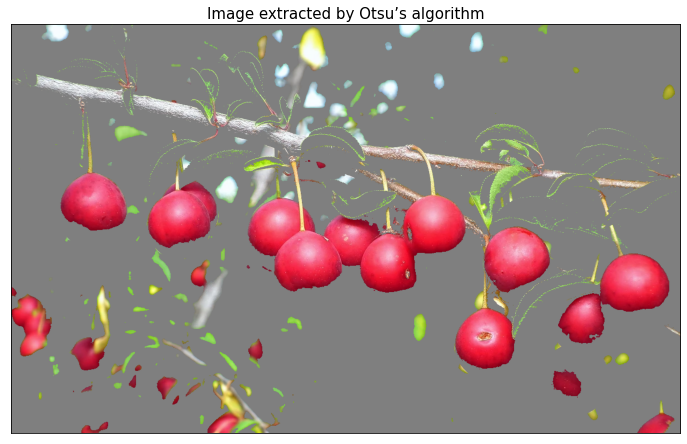

In [93]:
segment_img_Otsu = np.copy(img)
mask = r > optimal_threshold
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if mask[i,j] == 0:
      segment_img_Otsu[i,j] = 127

plt.figure(figsize=(12,12))
plt.title('Image extracted by Otsu’s algorithm', fontsize = 15), plt.xticks([]), plt.yticks([])
show_segment_img_Otsu = cv2.cvtColor(segment_img_Otsu, cv2.COLOR_BGR2RGB)
plt.imshow(show_segment_img_Otsu)
plt.show()

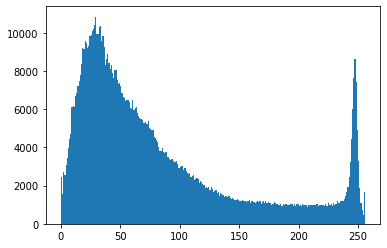

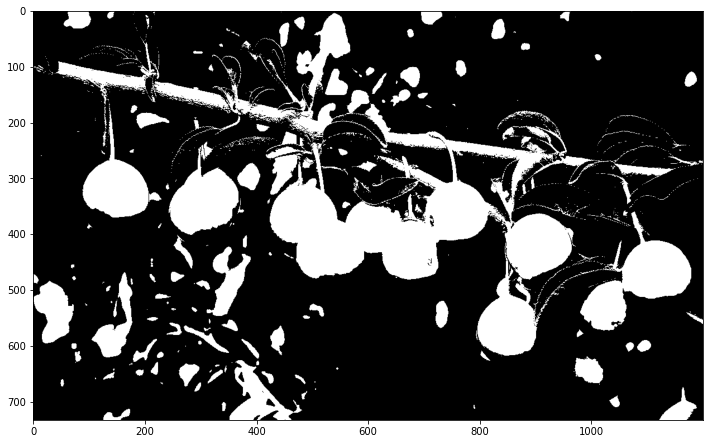

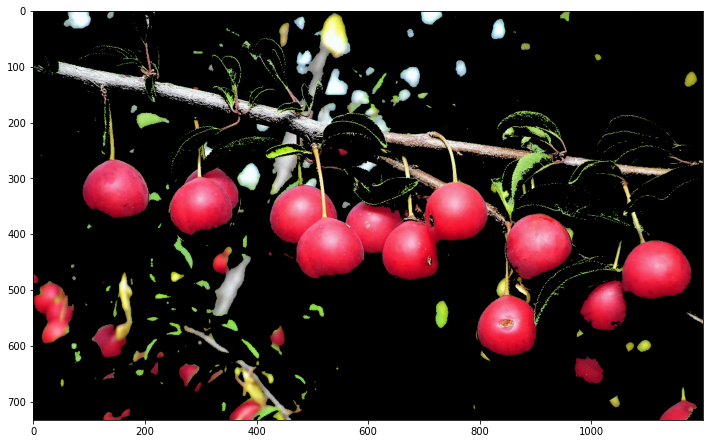

In [4]:
r = img[:,:,2]
plt.hist(r.ravel(),256,[0,256])
plt.show()
ret,th = cv2.threshold(r,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
result = cv2.bitwise_and(img, img, mask=th)

plt.figure(figsize=(12,12))
plt.imshow(th,'gray')
plt.show()
plt.figure(figsize=(12,12))
show_result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(show_result)
plt.show()